# INSTALL LIBRARY GOOGLE PLAY SCRAPER

In [ ]:
# INSTALLING GOOGLE PLAY SCRAPER PACKAGE

!pip install google_play_scraper

# TAHAP SCRAPING DATA

Data diambil dari urutan ulasan yang terbaru pada aplikasi Tokocrypto di Google Play Store.

In [4]:
# TAHAP SCRAPING DATA

import pandas as pd
import numpy as np

In [2]:
from google_play_scraper import Sort, reviews
# https://play.google.com/store/apps/details?id=com.binance.cloud.tokocrypto&hl=id&pli=1
result, continuation_token = reviews(
    'com.binance.cloud.tokocrypto',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # pengurutan data yang ingin diambil bisa menggunakan Sort.MOST_RELEVANT atau Sort.NEWEST
    count=900, # jumlah data yang mau diambil
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [10]:
result[9]

{'reviewId': '326fe6c9-0076-48fe-bfd8-1b31ab2f5295',
 'userName': 'WIYANO YANO',
 'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjUd7iSTlwr1SwVn685qM-vQ0xOURqo7hiZHAmqSBTb9NgU',
 'content': 'Tolong di permudah wd saya mau wd aja sulit google authenticator Saya lupa ribet nya setengah mati harus foto lah gilaran mau depo cepet amat gak perlu lagi pake kode google authenticator asu lah tko',
 'score': 1,
 'thumbsUpCount': 0,
 'reviewCreatedVersion': '2.7.0',
 'at': datetime.datetime(2024, 1, 13, 11, 28, 35),
 'replyContent': 'hi kak Wiyano, jika ada kendala di akun Tokocrypto kakak bisa ke live chat untuk dibantu oleh customer support kami ya😊👍🏼',
 'repliedAt': datetime.datetime(2024, 1, 16, 7, 50, 6)}

In [12]:
df_alpi = pd.DataFrame(np.array(result),columns=['review'])

df_alpi = df_alpi.join(pd.DataFrame(df_alpi.pop('review').tolist()))

df_alpi.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,689249aa-68d2-4eb1-b272-ce4ed3126887,george zulkarnain,https://play-lh.googleusercontent.com/a/ACg8oc...,"Sumpah ini aplikasi parah sekali, pantas banya...",1,0,2.7.0,2024-01-15 05:56:10,"hi kak Zulkarnain, mohon maaf atas ketidaknyam...",2024-01-16 07:42:32
1,4fa23324-089d-4ca4-9088-f9fe754b3b6c,syamie rizaldie,https://play-lh.googleusercontent.com/a/ACg8oc...,Dana tertahan ga bisa di wd,1,0,None,2024-01-14 21:46:18,Apakah kak Rizaldie baru saja melakukan reset?,2024-01-16 07:43:56
2,0bb665aa-4233-48e7-b0df-11b8a1a0edc8,Buikian 43,https://play-lh.googleusercontent.com/a/ACg8oc...,Sangat puas ...dengan aplikasi ini,5,0,2.7.0,2024-01-14 21:05:28,None,NaT
3,bf4150cd-5667-4fe9-a3fc-d865e01dda84,Tari Jayanti,https://play-lh.googleusercontent.com/a/ACg8oc...,Isi kode L A 5 5 Z B D 2 tanpa spasi memang be...,3,0,2.7.0,2024-01-14 20:51:22,yuk Tokonauts bisa gunakan kode referral kak T...,2024-01-16 07:44:34
4,d29cb2f4-bbaf-4e86-b960-7a300878c838,Cania Ayu,https://play-lh.googleusercontent.com/a/ACg8oc...,Buat pemula aku saranin pake apk ini karena ap...,5,0,None,2024-01-14 19:44:08,None,NaT


In [13]:
#MENYIMPAN HASIL CRAWLING DATA KE DALAM CSV

df_alpi[['userName','at','content','score']].head()
df = df_alpi[['userName','at','content','score']]
df.to_csv('data_skripsibaru2.csv',index=False)

In [14]:
pwd

'C:\\Users\\asus'

# TAHAP TEXT PREPROCESSING

Merupakan tahap untuk mengubah data mentah menjadi data yang siap diolah hingga mendapatkan hasil akurasi yang terbaik. Tahap Preprocessing ini terdiri dari Cleaning, Case Folding, Tokenizing, Normalization, Stopwords Removal, dan Stemming.

In [20]:
# TAHAP PREPROCESSING

import pandas as pd

In [45]:
dataku = pd.read_csv('data_skripsi_validasi_fix.csv', sep=';')
# dataku = pd.read_csv('data_skripsibaru2.csv', sep=';')

dataku.ulasan[400]

'Kenapa mau penarikan dipersulit?'

In [46]:
# CLEANING 

import re
import string

def cleaning(ulasan):
    Ulasan = ulasan.strip() # Menghapus karakter kosong
    Ulasan = re.sub(r"\d+", "", ulasan)  # Menghapus angka
    Ulasan = Ulasan.translate(str.maketrans("","",string.punctuation)) # Menghapus tanda baca

    return Ulasan
dataku['ulasan'] = dataku['ulasan'].apply(cleaning)

def berulang(Ulasan):
    # Untuk menghapus 3 atau lebih karakter berulang seperti goool -> gool.
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    
    return pattern.sub(r"\1\1", Ulasan)
dataku['ulasan'] = dataku['ulasan'].apply(berulang)

def remove_emoji(Ulasan):
    # Menghapus emoji atau emoticon
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', Ulasan)
dataku['ulasan'] = dataku['ulasan'].apply(remove_emoji)
dataku['ulasan'][400]

'Kenapa mau penarikan dipersulit'

In [4]:
# Simpan hasil cleaning ke csv
dataku.to_csv('DATA_SKRIPSI_VALIDASI_CLEANING.csv')

In [47]:
# CASE FOLDING

def casefolding(text):
    # Mengubah huruf menjadi lowercase (huruf kecil)
    text = text.lower()

    return text
dataku['ulasan'] = dataku['ulasan'].apply(casefolding)
dataku['ulasan'][400]

'kenapa mau penarikan dipersulit'

In [6]:
# Simpan hasil case folding ke csv
dataku.to_csv('DATA_SKRIPSI_VALIDASI_CASEFOLDING.csv')

In [48]:
#TOKENIZING

import nltk

def tokenizing(text):
    # Menggunakan library ntlk untuk memisahkan kata dalam kalimat
    text = nltk.tokenize.word_tokenize(text)

    return text
dataku['ulasan'] = dataku['ulasan'].apply(tokenizing)
dataku['ulasan'][400]

['kenapa', 'mau', 'penarikan', 'dipersulit']

In [34]:
dataku['ulasan'][400]

['kenapa', 'mau', 'penarikan', 'dipersulit', '?']

In [49]:
# Simpan hasil cleaning ke csv
dataku.to_csv('DATA_SKRIPSI_VALIDASI_TOKENIZING.csv')

In [52]:
dataku['ulasan'][400]

['kenapa', 'mau', 'penarikan', 'dipersulit']

In [58]:
# NORMALIZATION

normalizad_word = pd.read_excel("normalisasi.xlsx")
# len(normalizad_word)
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

dataku['ulasan'] = dataku['ulasan'].apply(normalized_term)

dataku['ulasan'][400]

['mengapa', 'mau', 'penarikan', 'dipersulit']

In [59]:
#Simpan hasil normalization ke csv
dataku.to_csv('DATA_SKRIPSI_VALIDASI_NORMALIZATION.csv')

In [60]:
# STOPWORD REMOVAL

from nltk.corpus import stopwords
#nltk.download('stopwords')
import nltk
#nltk.download('stopwords')

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["tolol", "anjing", "bego", "setan", "sampah", "kocak", "wkwkwk", "hahaha", "hehehe",
                      "konyol", "lah", "lho", "yok", "kok", "kah", "sih", "woy", "deh", "busuk", "moon",
                      "gan", "min", "konyol", "hah", "an", "rp", "nih", "gw", "gue", "gua",
                      "lu", "asu", "guys", "eh", "dah", "dong", "pun", "kek", "review", "yuk", "versi",
                      "uid", "vqhjz", "lxs", "ak", "pnl", "...", ",,", "air", "drop", "nft", "futures",
                      "hdeuh", "tx", "inu", "earn", "ngotak"])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
# ---------------------------------------------------------------------------------------
# convert list to dictionary
list_stopwords = set(list_stopwords)

# hapus stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dataku['ulasan'] = dataku['ulasan'].apply(stopwords_removal) 
print(dataku['ulasan'])

0                 [disuruh, penarikan, dana, dipersulit]
1      [aplikasi, susah, penarikan, uang, habis, perb...
2                [sesi, kadaluwarsa, akun, mengecewakan]
3                                                  [oke]
4      [penarikan, gagal, dipersulit, akun, ditangguh...
                             ...                        
398       [aplikasinya, akun, terdeteksi, ceritanya, hp]
399             [pajak, jual, belinya, penarikan, mahal]
400                              [penarikan, dipersulit]
401                                               [suka]
402    [setoran, koinnya, suka, hilang, dijual, belin...
Name: ulasan, Length: 403, dtype: object


In [61]:
#Simpan hasil stopwords ke csv
dataku.to_csv('DATA_SKRIPSI_VALIDASI_STOPWORDS.csv')

In [64]:
#STEMMING

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in dataku['ulasan']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def stemming(document):
    return [term_dict[term] for term in document]

dataku['ulasan'] = dataku['ulasan'].apply(stemming)
print(dataku['ulasan'])
dataku['ulasan'][398]

764
------------------------
suruh : suruh
tari : tari
dana : dana
sulit : sulit
aplikasi : aplikasi
susah : susah
uang : uang
habis : habis
baru : baru
kemarin : kemarin
masuk : masuk
email : email
otp : otp
payah : payah
sesi : sesi
kadaluwarsa : kadaluwarsa
akun : akun
kecewa : kecewa
oke : oke
gagal : gagal
tangguh : tangguh
saldo : saldo
juta : juta
hangus : hangus
jauh : jauh
tokocrypto : tokocrypto
apes : apes
main : main
puas : puas
ribet : ribet
unduh : unduh
pakai : pakai
aneh : aneh
ulang : ulang
setor : setor
kripto : kripto
proses : proses
benar : benar
pas : pas
sandi : sandi
salah : salah
tolong : tolong
mantap : mantap
pokok : pokok
baik : baik
indonesia : indonesia
layak : layak
edar : edar
rugi : rugi
konsumen : konsumen
kirim : kirim
aset : aset
bnb : bnb
beb : beb
alamat : alamat
tambah : tambah
selesai : selesai
isi : isi
atur : atur
bayar : bayar
denda : denda
rupiah : rupiah
biar : biar
perkara : perkara
rampok : rampok
pantas : pantas
surat : surat
adu : adu
kom

baget : baget
wajib : wajib
sumpah : sumpah
jelas : jelas
adminnya : adminnya
respon : respon
arah : arah
kriptomu : kriptomu
warga : warga
cuannya : cuannya
deh : deh
akses : akses
via : via
virtual : virtual
salut : salut
turun : turun
cair : cair
standar : standar
sempat : sempat
program : program
tkoindonesia : tkoindonesia
internasional : internasional
alarm : alarm
telat : telat
spesifikasi : spesifikasi
sinyal : sinyal
nyentuh : nyentuh
bunyi : bunyi
super : super
ketat : ketat
lindung : lindung
perintah : perintah
inves : inves
unggul : unggul
nama : nama
asia : asia
detik : detik
juga : juga
manfaat : manfaat
kerap : kerap
bagi : bagi
bentuk : bentuk
apresiasi : apresiasi
nyoba : nyoba
mulu : mulu
gimna : gimna
nobat : nobat
instal : instal
iseng : iseng
kendara : kendara
motor : motor
alhamdullilah : alhamdullilah
mobil : mobil
perak : perak
jiwa : jiwa
legal : legal
badan : badan
cinta : cinta
ram : ram
alat : alat
terjun : terjun
bareng : bareng
boros : boros
paket : paket


['aplikasi', 'akun', 'deteksi', 'cerita', 'hp']

In [67]:
dataku['ulasan'][398]

['aplikasi', 'akun', 'deteksi', 'cerita', 'hp']

In [14]:
# Simpan hasil stemming ke csv
dataku.to_csv('DATA_SKRIPSI_VALIDASI_STEMMING.csv')

# TAHAP TF-IDF dan Split Data

Tahap untuk pembagian data latih dan data uji dengan menggunakan metode split data 3 skenario 90:10, 80:20, dan 70:30. Tahap ini juga untuk melakukan perhitungan pembobotan kata dari data yang digunakan.

In [20]:
# Membaca File Csv

dataku=pd.read_csv('DATA_SKRIPSI_VALIDASI_STEMMING.csv', sep=';')

len(dataku)

403

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Baca dataset
dataku = pd.read_csv('DATA_SKRIPSI_VALIDASI_STEMMING.csv', sep=';')

# Ambil kolom yang berisi teks (misalnya, kolom 'teks')
teks_data = dataku['ulasan'].tolist()

# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transformasi teks menjadi matriks TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(teks_data)

# Ambil kata-kata yang terindeks
kata_kunci = tfidf_vectorizer.get_feature_names_out()

# Ambil nilai IDF untuk setiap kata
nilai_idf = tfidf_vectorizer.idf_

# Gabungkan ke dalam DataFrame
df_idf = pd.DataFrame(list(zip(kata_kunci, nilai_idf)), columns=['Kata', 'IDF'])

# Tampilkan DataFrame
print(df_idf)


         Kata       IDF
0        abal  6.308268
1        abis  6.308268
2       abjad  6.308268
3     absolut  6.308268
4        acak  6.308268
..        ...       ...
742       was  6.308268
743  whatsapp  6.308268
744       wib  6.308268
745    widget  6.308268
746       xmr  6.308268

[747 rows x 2 columns]


In [13]:
# KALAU SPLIT DATA MENJADI 90:10 nilai 0.1
# KALAU SPLIT DATA MENJADI 80,20 nilai 0.2
# KALAU SPLIT DATA MENJADI 70,30 nilai 0.3

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataku['ulasan'], dataku['label'],
                                        test_size = 0.2, random_state=42)

print("Train: ", X_train.shape, Y_train.shape, "Test: ", (X_test.shape,Y_test.shape))

Train:  (322,) (322,) Test:  ((81,), (81,))


In [15]:
# Menampilkan data asli yang tergolong sebagai data latih
original_train_data = dataku.loc[Y_train.index]
print("Data Asli yang Tergolong sebagai Data Latih:")
print(original_train_data)

# Menampilkan data asli yang tergolong sebagai data latih
original_train_data = dataku.loc[Y_train.index]

# Menyimpan DataFrame ke dalam file CSV
original_train_data.to_csv('data_latih_asli.csv', index=False)

Data Asli yang Tergolong sebagai Data Latih:
                    username           tanggal  \
353            Anas Natariks  10/03/2023 18:15   
233            Permata Swara  18/03/2023 17:05   
3                  Anto Bass  01/05/2023 05:31   
18               media photo  24/04/2023 17:17   
131  Deden Arif Dinul Hakiki  27/03/2023 17:16   
..                       ...               ...   
71                  Eko Heru  03/04/2023 19:59   
106                SHOLICHIN  30/03/2023 12:56   
270             Bobby Irawan  15/03/2023 17:05   
348                Marks Aja  11/03/2023 00:27   
102           Mokhamad Yusup  30/03/2023 22:26   

                                                ulasan    label  
353  ['tokocrypto', 'milik', 'fitur', 'lengkap', 'm...  Positif  
233  ['notif', 'alarm', 'harga', 'telat', 'buka', '...  Negatif  
3                                              ['oke']  Positif  
18                                     ['xmr', 'baik']  Positif  
131  ['jual', 'beli', 'm

In [17]:
# EKSTRAKSI FITUR DENGAN TF-IDF DATA LATIH

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

feature_names = vectorizer.get_feature_names_out()

dense = tf_x_train.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
print(df)

     abal  abis  absolut     acara  ada     admin  adu  ajaib  ajar  aju  ...  \
0     0.0   0.0      0.0  0.167264  0.0  0.161583  0.0    0.0   0.0  0.0  ...   
1     0.0   0.0      0.0  0.000000  0.0  0.000000  0.0    0.0   0.0  0.0  ...   
2     0.0   0.0      0.0  0.000000  0.0  0.000000  0.0    0.0   0.0  0.0  ...   
3     0.0   0.0      0.0  0.000000  0.0  0.000000  0.0    0.0   0.0  0.0  ...   
4     0.0   0.0      0.0  0.000000  0.0  0.000000  0.0    0.0   0.0  0.0  ...   
..    ...   ...      ...       ...  ...       ...  ...    ...   ...  ...  ...   
317   0.0   0.0      0.0  0.000000  0.0  0.000000  0.0    0.0   0.0  0.0  ...   
318   0.0   0.0      0.0  0.000000  0.0  0.000000  0.0    0.0   0.0  0.0  ...   
319   0.0   0.0      0.0  0.000000  0.0  0.000000  0.0    0.0   0.0  0.0  ...   
320   0.0   0.0      0.0  0.000000  0.0  0.000000  0.0    0.0   0.0  0.0  ...   
321   0.0   0.0      0.0  0.000000  0.0  0.000000  0.0    0.0   0.0  0.0  ...   

     virus  voucer  wadah  

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataku['ulasan'], dataku['label'],
                                        test_size = 0.2, random_state=42)

print("Test: ", X_test.shape,Y_test.shape, "Test: ", (X_train.shape, Y_train.shape))

Test:  (81,) (81,) Test:  ((322,), (322,))


In [16]:
# Menampilkan data asli yang tergolong sebagai data latih
original_test_data = dataku.loc[Y_test.index]
print("Data Asli yang Tergolong sebagai Data Uji:")
print(original_test_data)

# Menampilkan data asli yang tergolong sebagai data latih
original_test_data = dataku.loc[Y_test.index]

# Menyimpan DataFrame ke dalam file CSV
original_test_data.to_csv('data_uji_asli.csv', index=False)

Data Asli yang Tergolong sebagai Data Uji:
                    username           tanggal  \
70              togok gaming  03/04/2023 21:14   
281         Sirojulfalah Art  15/03/2023 03:23   
283       I Nyoman Palgunadi  14/03/2023 23:08   
33                  Sukma Na  18/04/2023 18:42   
42                    Al Nah  16/04/2023 22:30   
..                       ...               ...   
45   Ronaldus Bagas Prasetyo  15/04/2023 06:43   
90                    Hamzah  31/03/2023 16:29   
248             Ipan Riyanto  17/03/2023 16:49   
337             yapriel riel  11/03/2023 21:37   
390           Nadya Hutagaol  04/03/2023 05:36   

                                                ulasan    label  
70   ['aplikasi', 'tarik', 'pakai', 'google', 'auth...  Negatif  
281  ['hilang', 'akses', 'google', 'authenticator',...  Negatif  
283  ['alam', 'buruk', 'tarik', 'bnb', 'dompet', 'g...  Negatif  
33                                          ['mantap']  Positif  
42                        

In [9]:
# EKSTRAKSI FITUR DENGAN TF-IDF DATA UJI

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

feature_names = vectorizer.get_feature_names_out()

dense = tf_x_test.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
print(df)

    abal  abis  absolut     acara      ada     admin  adu  ajaib      ajar  \
0    0.0   0.0      0.0  0.000000  0.00000  0.000000  0.0    0.0  0.000000   
1    0.0   0.0      0.0  0.000000  0.00000  0.155422  0.0    0.0  0.000000   
2    0.0   0.0      0.0  0.000000  0.00000  0.000000  0.0    0.0  0.000000   
3    0.0   0.0      0.0  0.000000  0.00000  0.000000  0.0    0.0  0.000000   
4    0.0   0.0      0.0  0.000000  0.00000  0.000000  0.0    0.0  0.000000   
..   ...   ...      ...       ...      ...       ...  ...    ...       ...   
76   0.0   0.0      0.0  0.000000  0.00000  0.000000  0.0    0.0  0.501082   
77   0.0   0.0      0.0  0.000000  0.00000  0.000000  0.0    0.0  0.000000   
78   0.0   0.0      0.0  0.000000  0.00000  0.000000  0.0    0.0  0.000000   
79   0.0   0.0      0.0  0.363445  0.22294  0.000000  0.0    0.0  0.000000   
80   0.0   0.0      0.0  0.000000  0.00000  0.000000  0.0    0.0  0.000000   

    aju  ...  virus  voucer  wadah  wajib  warga  was  whatsapp

# TAHAP DATA MINING dan EVALUATION


In [18]:
# CLASSIFICATION WITH KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=3) # penentuan penggunaan nilai k
knn.fit(tf_x_train, Y_train)
knn_score = knn.score(tf_x_test, Y_test)

print("Hasil Algoritma KNN dengan TF-IDF")
print(knn_score)
print('===========================================================')
y_pred_knn = knn.predict(tf_x_test)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_knn).ravel()
print("TN:",tn," FP:", fp," FN:", fn," TP:", tp)

# Confusion matrix

print(f'Confusion Matrix:\n{confusion_matrix(Y_test, y_pred_knn)}')
print('===========================================================\n')
print(classification_report(Y_test, y_pred_knn, zero_division=0))

Hasil Algoritma KNN dengan TF-IDF
0.9506172839506173
TN: 35  FP: 2  FN: 2  TP: 42
Confusion Matrix:
[[35  2]
 [ 2 42]]

              precision    recall  f1-score   support

     Negatif       0.95      0.95      0.95        37
     Positif       0.95      0.95      0.95        44

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81



C:\Users\asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [28]:
type(Y_test)
Y_test

70     Negatif
281    Negatif
283    Negatif
33     Positif
42     Negatif
        ...   
45     Positif
90     Positif
248    Positif
337    Positif
390    Positif
Name: label, Length: 81, dtype: object

In [19]:
# Prediksi untuk beberapa sampel dari data uji
some_predictions = knn.predict(tf_x_test[:5])
actual_labels = Y_test[:5]

print('Some predictions:', some_predictions)
print('Actual labels   :', actual_labels)

Some predictions: ['Negatif' 'Negatif' 'Negatif' 'Positif' 'Negatif']
Actual labels   : 70     Negatif
281    Negatif
283    Negatif
33     Positif
42     Negatif
Name: label, dtype: object


C:\Users\asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# MEMVISUALISASIKAN DATA MELALUI WORDCLOUD

In [42]:
import pandas as pd

data=pd.read_csv('DATA_SKRIPSI_VALIDASI_STEMMING.csv', sep=';')
data.head()

,username,tanggal,ulasan,label
0,Artemis Raya,01/05/2023 22:08,"['suruh', 'tarik', 'dana', 'sulit']",Negatif
1,Al falah Chanel 2,01/05/2023 17:29,"['aplikasi', 'susah', 'tarik', 'uang', 'habis'...",Negatif
2,Nahya Aji,01/05/2023 15:00,"['sesi', 'kadaluwarsa', 'akun', 'kecewa']",Negatif
3,Anto Bass,01/05/2023 05:31,['oke'],Positif
4,Error Empat Kosong Empat Life Not Found,01/05/2023 00:39,"['tarik', 'gagal', 'sulit', 'akun', 'tangguh',...",Negatif


In [43]:
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
data["ulasan"] = data["ulasan"].apply(join_text_list)

data["ulasan"].head()

0                               suruh tarik dana sulit
1    aplikasi susah tarik uang habis baru kemarin m...
2                         sesi kadaluwarsa akun kecewa
3                                                  oke
4    tarik gagal sulit akun tangguh saldo juta hang...
Name: ulasan, dtype: object

In [44]:
#Menyimpan ke dalam csv

data.to_csv('DATA_SKRIPSI_VALIDASI_VISUALISASI.csv')

In [46]:
#Membaca File yang disimpan

df=pd.read_csv('DATA_SKRIPSI_VALIDASI_VISUALISASI.csv', sep=';')
df.head()

,username,tanggal,ulasan,label
0,Artemis Raya,01/05/2023 22:08,suruh tarik dana sulit,Negatif
1,Al falah Chanel 2,01/05/2023 17:29,aplikasi susah tarik uang habis baru kemarin m...,Negatif
2,Nahya Aji,01/05/2023 15:00,sesi kadaluwarsa akun kecewa,Negatif
3,Anto Bass,01/05/2023 05:31,oke,Positif
4,Error Empat Kosong Empat Life Not Found,01/05/2023 00:39,tarik gagal sulit akun tangguh saldo juta hang...,Negatif


In [47]:
Positif = df.loc[df['label'] == 'Positif']
Negatif = df.loc[df['label'] == 'Negatif']

# VISUALISASI ULASAN POSITIF

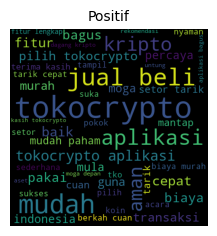

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 400, height = 400,
                     background_color = 'black',
                     min_font_size = 10).generate(' '.join(map(str, Positif['ulasan'])))

plt.figure(figsize = (5,3), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Positif', y=1, fontsize = 10)
plt.tight_layout(pad = 3)
plt.show()

# VISUALISASI ULASAN NEGATIF

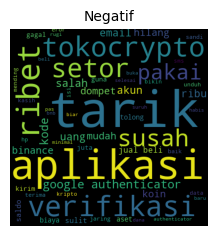

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 400, height = 400,
                     background_color = 'black',
                     min_font_size = 10).generate(' '.join(map(str, Negatif['ulasan'])))

plt.figure(figsize = (5,3), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Negatif', fontsize = 10)
plt.tight_layout(pad = 3)
plt.show()